### Create plots for the results
Use seaborn lineplot 
https://stackabuse.com/seaborn-line-plot-tutorial-and-examples

# Be careful with the order of the algorithms!!! 
#  safeMADDPGsoft, MADDPG, safeMADDPGsoftrewards, safeMADDPGhard

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [85]:
#abs_path   = os.path.dirname(os.path.abspath(__file__)) + '/'

In [193]:
safe_maddpg_soft = '../data/agents/SafeMADDPG_soft/'
safe_maddpg_hard = '../data/agents/SafeMADDPG_hard/'
maddpg_vanilla   = '../data/agents/MADDPG/'
safe_maddpg_soft_rewards = '../data/agents/SafeMADDPG_soft_rewards/'

In [215]:
seed_range = np.arange(5,12)
N = 8000

In [216]:
rewards_soft    = []
rewards_hard    = []
rewards_maddpg = []
rewards_seed=[]
rewards_soft_rewards =[]

collisions_seed=[]
collisions_soft=[]
collisions_hard =[]
collisions_maddpg=[]
collisions_soft_rewards= []
    
infeasibilities_soft = []
infeasibilities_hard = []

In [67]:
#list(range(0,8000, 10))*2

In [217]:
for seed in seed_range:
    

    # Import Results
    
    #rewards:
    rewards_soft.append(np.load(safe_maddpg_soft +"seed" + str(seed) + "/" + 'rewards.npy')[0:N:10]) #list of arrays
    rewards_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/"+'rewards.npy')[0:N:10])
    rewards_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    rewards_soft_rewards.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    rewards_seed.append([seed]*len(rewards_soft[-1]))
    
    #collisions:
    collisions_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_soft_rewards.append(np.load(safe_maddpg_soft_rewards + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" +'collisions.npy')[0:N])
    collisions_seed.append([seed]*len(collisions_soft[-1]))
    
    
    #infeasibilities:
    #infeasibilities_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])
    #infeasibilities_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])

episodes_list_rew=list(range(0,8000, 10))*len(rewards_soft)
episodes_list_col= list(range(0,8000))*len(rewards_soft)

In [218]:
#flatten list
rewards_soft_list = [item for sublist in rewards_soft for item in sublist]
rewards_maddpg_list = [item for sublist in rewards_maddpg for item in sublist]
rewards_soft_rewards_list=[item for sublist in rewards_soft_rewards for item in sublist]
rewards_hard_list = [item for sublist in rewards_hard for item in sublist]
rewards_seed_list= [item for sublist in rewards_seed for item in sublist]
rewards_type=['soft_MADDPG']*len(rewards_soft_list) + ['MADDPG']*len(rewards_maddpg_list) + ['soft_MADDPG_rewards']*len(rewards_soft_rewards_list) + ['MADDPG_hard']*len(rewards_hard_list)

In [219]:
rewards_df=pd.DataFrame()
rewards_df['type']=rewards_type
rewards_df['seed']=rewards_seed_list*4
rewards_df['reward']=rewards_soft_list + rewards_maddpg_list + rewards_soft_rewards_list + rewards_hard_list
rewards_df['episode']=episodes_list_rew*4 #4 times the same, one for each algorithm

In [ ]:
rewards_df.head()

In [220]:
collisions_soft_list = [item for sublist in collisions_soft for item in sublist]
collisions_soft_rewards_list = [item for sublist in collisions_soft_rewards for item in sublist]
collisions_maddpg_list = [item for sublist in collisions_maddpg for item in sublist]
collisions_seed_list= [item for sublist in collisions_seed for item in sublist]
collisions_hard_list= [item for sublist in collisions_hard for item in sublist]
collisions_type=['soft_MADDPG']*len(collisions_soft_list) + ['MADDPG']*len(collisions_maddpg_list) + ['soft_MADDPG_rewards']*len(collisions_soft_rewards_list)+ ['hard_MADDPG']*len(collisions_hard_list)

In [221]:
collisions_df=pd.DataFrame()
collisions_df['Type']=collisions_type
collisions_df['Seed']=collisions_seed_list*4
collisions_df['Total Collisions']=collisions_soft_list + collisions_maddpg_list + collisions_soft_rewards_list+ collisions_hard_list
collisions_df['Episode']=episodes_list_col*4

In [222]:
collisions_df

,Type,Seed,Total Collisions,Episode
0,soft_MADDPG,5,0,0
1,soft_MADDPG,5,0,1
2,soft_MADDPG,5,0,2
3,soft_MADDPG,5,0,3
4,soft_MADDPG,5,1,4
...,...,...,...,...
223995,hard_MADDPG,11,71924,7995
223996,hard_MADDPG,11,71924,7996
223997,hard_MADDPG,11,71924,7997
223998,hard_MADDPG,11,71924,7998


### Plot for rewards: 

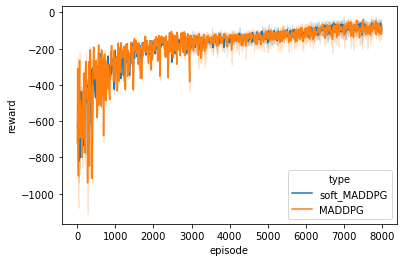

In [66]:
sns.lineplot(x = "episode", y = "reward",hue='type', data = rewards_df)
plt.show()

### Plot for collisions:

### Plot showing all 4 different procedures used.

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
figure = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', palette = 'bright', data = collisions_df, ax= ax)
#handles, labels = figure.get_legend_handles_labels()
#figure.legend(handles=handles[1:])
#figure.legend(handles=handles[1:], labels=labels[0:]) #to remove type from the legend
plt.show()

No handles with labels found to put in legend.


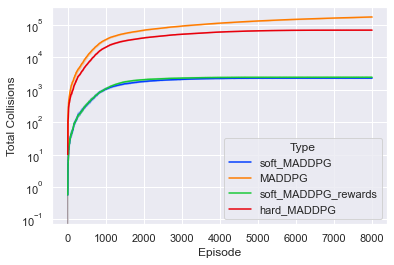

In [253]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
figure2 = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', palette = 'bright', data = collisions_df, ax = ax)
handles, labels = figure2.get_legend_handles_labels()
figure2.legend(handles=handles[1:], labels=labels[0:])
figure2.set(yscale='log')
plt.show()

### Plot comparing only the soft constraint procedures.

In [225]:
collisions_soft_df=collisions_df[(collisions_df['Type']!= 'MADDPG') & (collisions_df['Type']!= 'hard_MADDPG')]

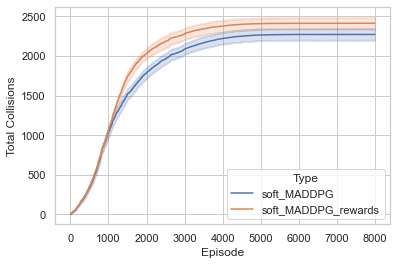

In [226]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
figure3 = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', data = collisions_soft_df, ax = ax)
handles, labels = figure3.get_legend_handles_labels()
figure3.legend(handles=handles[1:], labels=labels[0:])
plt.show()

### Create a barplot with average collisions per episode

### Return the cumsum to original observations:

In [227]:
def return_obs(df,seed):
    col = df[df['Seed']==seed]['Total Collisions'].values
    col_shifted= np.insert(np.delete(col, -1), 0, 0)
    return list(col-col_shifted)

In [228]:
observed_col=[]
for alg in ['soft_MADDPG','MADDPG','soft_MADDPG_rewards', 'hard_MADDPG']:
    df = collisions_df[collisions_df['Type']== alg]
    for seed in seed_range:
        observed_col.append(return_obs(df=df,seed=seed))         

In [229]:
observed_col_list = [item for sublist in observed_col for item in sublist]

In [230]:
collisions_df['Observed Collisions per Episode']=observed_col_list

In [232]:
collisions_soft_df=collisions_df[(collisions_df['Type']!= 'MADDPG') & (collisions_df['Type']!= 'hard_MADDPG')] 
#run again to have the observation column 

### Barplot for the mean of collisions per episode only for the soft procedures

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

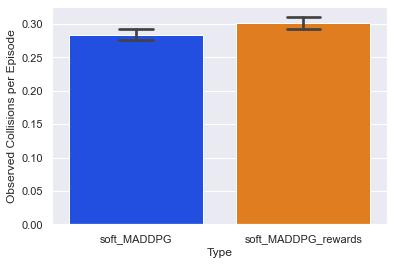

In [248]:
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Observed Collisions per Episode', data = collisions_soft_df , capsize=.2)

### Barplot for median collisions per episode for all 4 algorithms

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

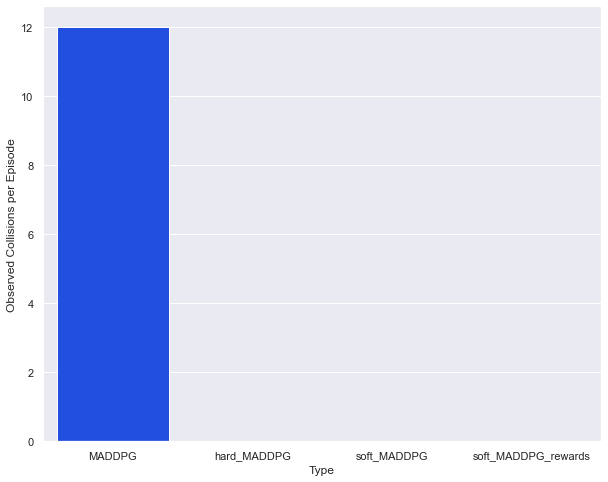

In [250]:
from numpy import median
#sns.set_theme(style="whitegrid")
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Observed Collisions per Episode', data = collisions_df, ax = ax, estimator=median, order=["MADDPG", "hard_MADDPG", 'soft_MADDPG', 'soft_MADDPG_rewards'])

### Barplot for average collisions per episode for all 4 algorithms (now used the mean instead of median)

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

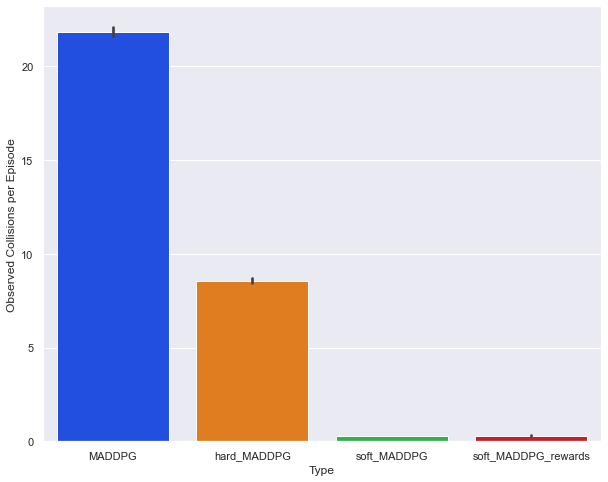

In [244]:
#sns.set_theme(style="whitegrid")
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Observed Collisions per Episode', data = collisions_df, ax=ax, order=["MADDPG", "hard_MADDPG", 'soft_MADDPG', 'soft_MADDPG_rewards'])

### Also try with boxplot: 

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

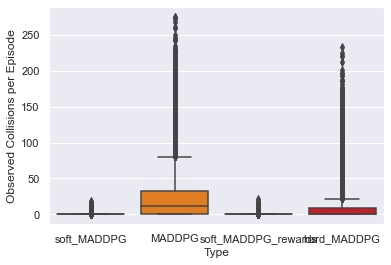

In [252]:
sns.boxplot(x='Type', y='Observed Collisions per Episode', data=collisions_df)